## Main Task
Using historical sales data from 2010 to 2018, forecast the daily (or weekly) sales volume (Number Sold) for each store-product combination in 2019.  
This forecast will help understand demand patterns and predict future inventory needs.

### Data Understanding
This dataset contains simulated time series data covering 10 years (2010-2019). The features include date, store id, product id and number sold.  
The train.csv covers the years 2010-2018 and the test.csv covers 2019 only. The are 7 unique stores and 10 unique products.  

### Exploratory Data Analysis

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv("Datasets/train2010_2018.csv")

In [3]:
dataset.head()

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230090 entries, 0 to 230089
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         230090 non-null  object
 1   store        230090 non-null  int64 
 2   product      230090 non-null  int64 
 3   number_sold  230090 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.0+ MB


In [5]:
dataset.describe()

,store,product,number_sold
count,230090.000000,230090.000000,230090.000000
mean,3.000000,4.500000,780.926107
std,2.000004,2.872288,204.096737
min,0.000000,0.000000,238.000000
25%,1.000000,2.000000,722.000000
50%,3.000000,4.500000,835.000000
75%,5.000000,7.000000,914.000000
max,6.000000,9.000000,1205.000000


In [6]:
# Checking Missing Values
dataset.isnull().sum()

Date           0
store          0
product        0
number_sold    0
dtype: int64

In [7]:
# Converting the String format of Date to datetime object, which enables time-based functionality like resampling.

dataset['Date'] = pd.to_datetime(dataset['Date'])

**Identifying Unique Time Series Patterns**  

Since we have multiple Store_IDs and Product_IDs, it’s essential to understand how each combination behaves over time.  
By visualizing these unique combinations, we can identify patterns like seasonality, trends, or irregularities in sales, which will influence our choice of forecasting models and preprocessing methods.

In [ ]:
unique_combinations = dataset.groupby(['store', 'product']).size()
# 7 Unique Stores, 10 Unique Products => 7 * 10 = 70 Unique Combinations.
print(f"Number of unique store-product combinations: {len(unique_combinations)}. Each Combination represents a unique time series.")

Number of unique store-product combinations: 70. Each Combination represents a unique time series.


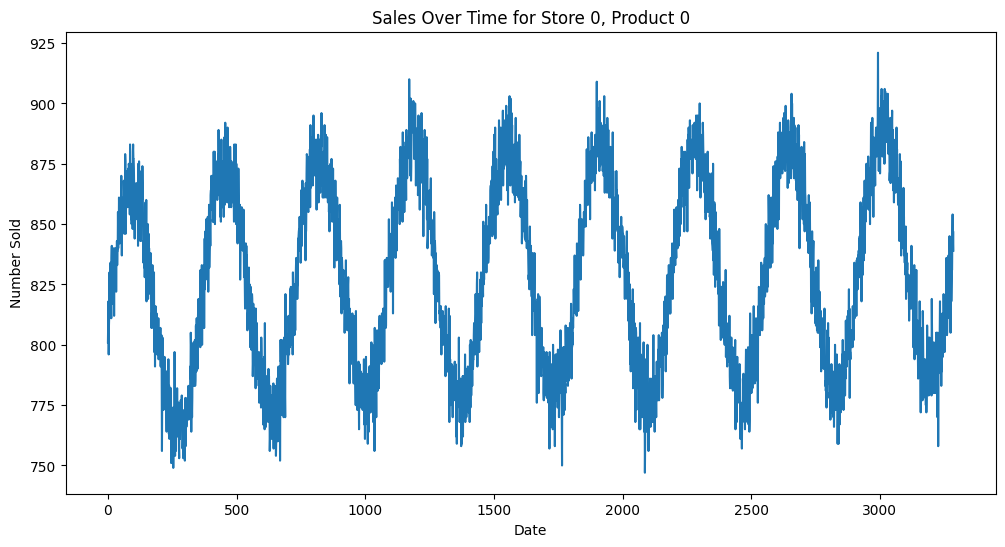

In [15]:
# Visualize sample time series:

# Select specific Store_ID and Product_ID combinations to plot
sample_data = dataset[(dataset['store'] == 0) & (dataset['product'] == 0)]
sample_data['number_sold'].plot(title="Sales Over Time for Store 0, Product 0", figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Number Sold')
plt.show()